# Emotion recognition- RAVDESS dataset

### Plotting an example for a sound wave:

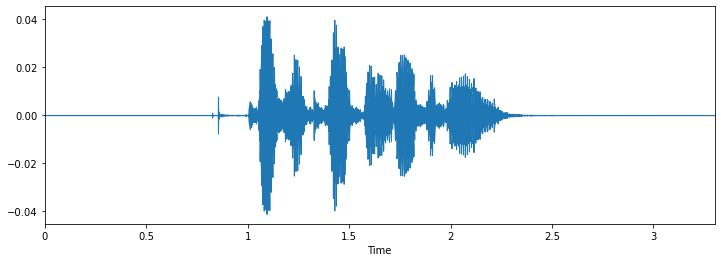

In [ ]:
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import numpy as np
from tqdm.notebook import tqdm
import glob

data, sampling_rate = librosa.load('D://ITC//final_project//data//data//Actor_01//03-01-01-01-01-01-01.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)
plt.show()

### Reading the data

In [ ]:
lst = []
path = 'D://ITC//final_project//data'

for root, dirs, files in tqdm(os.walk(path)):
    for file in files:
        try:
            #Load librosa array, obtain mfcss, store the file and the mfcss information in a new array
            X, sample_rate = librosa.load(os.path.join(root,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
            file = int(file[7:8])
            arr = mfccs, file
            lst.append(arr)
          # If the file is not valid, skip it
        except ValueError:
            continue

0it [00:00, ?it/s]

C:\Users\Talba\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
X, y = zip(*lst)

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((2628, 40), (2628,))

In [ ]:
# import pickle

# with open('d://ITC//final_project//x.pickle', 'wb') as f:
#     pickle.dump(X, f)
# with open('d://ITC//final_project//y.pickle', 'wb') as f:
#     pickle.dump(y, f)

In [ ]:
# import pickle

# with open('d://ITC//final_project//x.pickle', 'rb') as f:
#     X = pickle.load(f)
# with open('d://ITC//final_project//y.pickle', 'rb') as f:
#     y = pickle.load(f)

In [ ]:
set(y)

{1, 2, 3, 4, 5, 6, 7, 8}

In [ ]:
emotions = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'happy', 6:'fearful', 7:'disgust', 8:'surprised'}

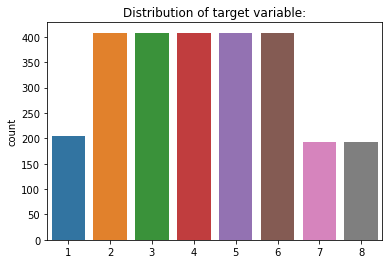

In [ ]:
import seaborn as sns

plt.title('Distribution of target variable:')
sns.countplot(y)
plt.show()

### Spotting outliers:

In [1]:
for i in X_df:
    Q1 = X_df[i].quantile(0.25)
    Q3 = X_df[i].quantile(0.75)
    IQR = Q3 - Q1
    print(f'Outliers in {i}:')
    print(np.array((X_df[i] < (Q1 - 1.5 * IQR)) |(X_df[i] > (Q3 + 1.5 * IQR))).nonzero())

In [2]:
plt.figure(figsize=(30,40))
for i,col in enumerate(X_df):
    plt.title(i, fontsize=20)
    plt.subplot(8,5,i+1)
    X_df[[col]].boxplot(fontsize=20)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

### outliers in these features-

- 0- <-1000
- 6- <-10
- 10- >20
- 12 >20
- 25 >10
- 26 >15


### replacing the outliers with median:

In [ ]:
median = X_df.loc[X_df[0] > -1000, 0].median()
X_df.loc[X_df[0] < -1000, 0] = np.nan
X_df[0].fillna(median,inplace=True)

median = X_df.loc[X_df[6] > -1000, 6].median()
X_df.loc[X_df[6] < -1000, 6] = np.nan
X_df[6].fillna(median,inplace=True)

median = X_df.loc[X_df[10] > -1000, 10].median()
X_df.loc[X_df[10] < -1000, 10] = np.nan
X_df[10].fillna(median,inplace=True)

median = X_df.loc[X_df[12] > -1000, 12].median()
X_df.loc[X_df[12] < -1000,12] = np.nan
X_df[12].fillna(median,inplace=True)

median = X_df.loc[X_df[25] > -1000, 25].median()
X_df.loc[X_df[25] < -1000, 25] = np.nan
X_df[25].fillna(median,inplace=True)

median = X_df.loc[X_df[26] > -1000, 26].median()
X_df.loc[X_df[26] < -1000, 26] = np.nan
X_df[26].fillna(median,inplace=True)

### At this point, we can perform a normal classification, using our mfccs coefficients as our features.

### We'll start by running a Logistic regression model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, \
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=150).fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\Users\Talba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.40      0.52        40
           2       0.46      0.51      0.48        81
           3       0.54      0.56      0.55        85
           4       0.46      0.56      0.50        73
           5       0.60      0.70      0.65        79
           6       0.64      0.62      0.63        90
           7       0.47      0.38      0.42        39
           8       0.40      0.26      0.31        39

    accuracy                           0.54       526
   macro avg       0.54      0.50      0.51       526
weighted avg       0.54      0.54      0.53       526



### Running RandomForest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred2 = reg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.90      0.65      0.75        40
           2       0.64      0.89      0.75        81
           3       0.78      0.61      0.68        85
           4       0.66      0.73      0.69        73
           5       0.79      0.75      0.77        79
           6       0.80      0.76      0.78        90
           7       0.74      0.59      0.66        39
           8       0.45      0.54      0.49        39

    accuracy                           0.71       526
   macro avg       0.72      0.69      0.70       526
weighted avg       0.73      0.71      0.71       526



In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred3 = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.45      0.38      0.41        40
           2       0.60      0.40      0.48        81
           3       0.61      0.40      0.48        85
           4       0.45      0.29      0.35        73
           5       0.68      0.49      0.57        79
           6       0.60      0.34      0.44        90
           7       0.20      0.62      0.30        39
           8       0.24      0.64      0.34        39

    accuracy                           0.42       526
   macro avg       0.48      0.44      0.42       526
weighted avg       0.52      0.42      0.44       526



### trying KNN, and therefore scale the features before:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scale, y_train)
y_pred4 = knn.predict(X_test_scale)

In [ ]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           1       0.52      0.82      0.64        40
           2       0.84      0.83      0.83        81
           3       0.67      0.74      0.70        85
           4       0.75      0.67      0.71        73
           5       0.71      0.82      0.76        79
           6       0.85      0.62      0.72        90
           7       0.91      0.54      0.68        39
           8       0.67      0.74      0.71        39

    accuracy                           0.73       526
   macro avg       0.74      0.72      0.72       526
weighted avg       0.75      0.73      0.73       526



### Running basic neural network:

In [ ]:
X_train.shape

(2102, 40)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


model = Sequential(
    [
     layers.Dense(256, activation="sigmoid", input_dim = 40),
     layers.Dense(64, activation="relu"),
     layers.Dense(8, activation="softmax")
    ]
)


In [ ]:
model.input_shape, model.output_shape

((None, 40), (None, 8))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 27,464
Trainable params: 27,464
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = y_train - 1
y_test = y_test - 1

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=500)

Epoch 1/500
119/119 [==============================] - 1s 4ms/step - loss: 0.1197 - accuracy: 0.9522 - val_loss: 1.9800 - val_accuracy: 0.6351
Epoch 2/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9417 - val_loss: 2.3756 - val_accuracy: 0.6445
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9327 - val_loss: 2.0302 - val_accuracy: 0.6635
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9455 - val_loss: 1.9600 - val_accuracy: 0.6919
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9492 - val_loss: 2.1258 - val_accuracy: 0.6209
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9475 - val_loss: 2.1504 - val_accuracy: 0.6351
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9375 - val_loss: 1.8861 - val_accuracy: 0.6540

In [ ]:
print("Evaluating on the test data")
results = model.evaluate(X_test, y_test, batch_size=20)
print("test loss, test acc:", results)

Evaluating on the test data
27/27 [==============================] - 0s 1ms/step - loss: 2.4268 - accuracy: 0.6350
test loss, test acc: [2.4267871379852295, 0.6349809765815735]


### Seems like our model doesn't really improve, and get's stuch around the 64% mark. We'll try a CNN network which are known to work with Speech recognision problems:

### First we'll add another dimension to our data in order for it to fit the model:

In [ ]:
x_train_new = np.expand_dims(X_train, axis=2)
x_test_new = np.expand_dims(X_test, axis=2)

In [ ]:
x_train_new.shape, x_test_new.shape

((2102, 40, 1), (526, 40, 1))

In [ ]:
model2 = Sequential(
    [
     layers.Conv1D(128, 3, activation='relu', input_shape=(40,1)),
     layers.MaxPooling1D(),
     layers.Conv1D(128, 3, activation='relu'),
     layers.MaxPooling1D(),
     layers.Conv1D(128, 3, activation='relu'),
     layers.MaxPooling1D(),
     layers.Flatten(),
     layers.Dense(64, activation="relu"),
     layers.Dense(8, activation="softmax")
    ]
)


In [ ]:
model2.input_shape, model2.output.shape

((None, 40, 1), TensorShape([None, 8]))

In [ ]:
model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 38, 128)           512       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 17, 128)           49280     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 8, 128)            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 6, 128)            49280     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 3, 128)            0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 384)             

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model2.fit(x_train_new, y_train, validation_split=0.1, batch_size=16, epochs=10)

Epoch 1/10
119/119 [==============================] - 1s 7ms/step - loss: 0.1209 - accuracy: 0.9524 - val_loss: 1.9974 - val_accuracy: 0.6635
Epoch 2/10
119/119 [==============================] - 1s 5ms/step - loss: 0.1593 - accuracy: 0.9325 - val_loss: 1.8278 - val_accuracy: 0.6777
Epoch 3/10
119/119 [==============================] - 1s 5ms/step - loss: 0.2298 - accuracy: 0.9258 - val_loss: 1.7046 - val_accuracy: 0.6588
Epoch 4/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0818 - accuracy: 0.9688 - val_loss: 1.8895 - val_accuracy: 0.6825
Epoch 5/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0806 - accuracy: 0.9666 - val_loss: 1.7779 - val_accuracy: 0.7156
Epoch 6/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0807 - accuracy: 0.9649 - val_loss: 1.7603 - val_accuracy: 0.7156
Epoch 7/10
119/119 [==============================] - 1s 5ms/step - loss: 0.0647 - accuracy: 0.9711 - val_loss: 1.7878 - val_accuracy: 0.7109
Epoch 

In [ ]:
print("Evaluating on the test data")
results = model2.evaluate(x_test_new, y_test, batch_size=100)
print("test loss, test acc:", results)

Evaluating on the test data
6/6 [==============================] - 0s 5ms/step - loss: 1.8146 - accuracy: 0.6958
test loss, test acc: [1.8145948648452759, 0.6958174705505371]
